# Exemplo do método Primal-Dual Path Following

## Definindo o problema 

Vamos resolver um problema que criei, com a ajuda do [GeoGebra](https://www.geogebra.org/). Na imagem abaixo, o conjunto viável está no primeiro quadrante em branco e $-c$ é o vetor $u$.

<img width=500 src="./ptosinteriores.png"/>

Vamos declarar as restrições já com as variáveis de folga/excesso, e o vetor de custo. Usaremos `numpy` para fazer as contas.

In [1]:
import numpy as np

A = np.array([
     [1, -1, 1, 0, 0, 0, 0],
     [1, -1, 0,-1, 0, 0, 0],
     [2, -1, 0, 0, 1, 0, 0],
     [1, -2, 0, 0, 0,-1, 0],
     [1,  1, 0, 0, 0, 0, 1]])
b = np.array([2, -2, 5, -6, 8])
c = np.array([-1,-3, 0, 0, 0, 0, 0])

Vamos escolher $x$ e $s$ iniciais e determinar $w$ calculando a solução de mínimos quadrados para o problema $$A^Tw = c-s$$

In [2]:
x = np.array([1, 1, 2, 2, 4, 5, 6])
s = np.array([1, 2, 1, 2, 1, 2, 1])
w = np.linalg.lstsq(np.transpose(A),c-s)[0]
# o método lstsq retorna várias coisas, e a primeira delas é a solução

## Resolvendo o problema
Agora, vamos resolver o problema para vários valores de $\sigma\in(0,1)$, e salvar os caminhos na variável `SOLUCOES`.

In [3]:
from pontosinteriores import PrimalDualPF
 
TOTAL_ITERATIONS = 32 
SOLUCOES = []
valores_de_sigma = [ j/TOTAL_ITERATIONS for j in range(1,TOTAL_ITERATIONS)]
# valores_de_sigma variam de 1/N até (N-1)/N, com N = TOTAL_ITERATIONS
NSIGMA = len(valores_de_sigma)

for sigma in valores_de_sigma: # para cada sigma
    problema = PrimalDualPF(A,b,c,x,w,s) 
    problema.solve(SIGMA=sigma)     # resolvemos o problema 
    SOLUCOES.append(problema.caminho) # e adicionamos o caminho as solucoes

Vamos analizar quantas iterações foram necessárias para convergir, em função de $\sigma$.

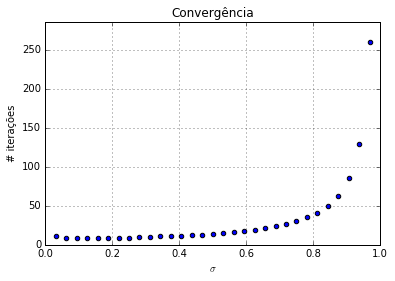

In [4]:
%matplotlib inline
n_iteracoes = [len(SOLUCOES[j][0]) for j in range(NSIGMA)]

import matplotlib.pyplot as plt 

plt.scatter(valores_de_sigma,n_iteracoes) # Plotando os valores de x e y
plt.xlim(0,1)                     # define os valores minimo e máximo de x
plt.ylim(0,1.1*max(n_iteracoes))  # colocamos uma folga de 10% pra ficar um gráfico mais bonito
plt.title("Convergência")
plt.xlabel("$\sigma$")            # definindo os títulos 
plt.ylabel("# iterações")
plt.grid()                        # Vamos exibir as grades
plt.show()

Agora, vamos usar interatividade. 
1. Primeiro, vamos calcular o valor máximo e mínimo de x e y para todos os caminhos calculados.
* Depois, definiremos uma função que, dado um valor de $\sigma$, plote o gráfico do caminho correspondente, juntamente com as retas das restrições lineares.
* Então, usaremos um *widget* para obtermos a interatividade.

In [5]:
#1. Calculando o valor máximo e mínimo para x e y
X_MIN = min([min(SOLUCOES[j][0]) for j in range(NSIGMA)])
X_MAX = max([max(SOLUCOES[j][0]) for j in range(NSIGMA)])
Y_MIN = min([min(SOLUCOES[j][1]) for j in range(NSIGMA)])
Y_MAX = max([max(SOLUCOES[j][1]) for j in range(NSIGMA)])

In [6]:
#2. Definindo a função que plota o gráfico do caminho...
def plotar(sigma): 
    j=sigma
    x,y = SOLUCOES[j][0], SOLUCOES[j][1]
    plt.figure(figsize=(9,7)) # definimos o tamanho da figura como 9x7"
    plt.plot(x,y,color='green', linestyle='dashed', marker='^',
     markerfacecolor='blue', markersize=5)         
    # plotamos o caminho em verde, com cada ponto marcado com um triangulo azul
    
    # Vamos aumentar um pouco a janela de exibição
    JX_MAX, JY_MAX = X_MAX + 0.2*(X_MAX-X_MIN), Y_MAX +0.2*(Y_MAX-Y_MIN) 
    JX_MIN, JY_MIN = X_MIN - 0.1*(X_MAX-X_MIN), Y_MIN -0.1*(Y_MAX-Y_MIN) 
    plt.xlim(JX_MIN,JX_MAX)       
    plt.ylim(JY_MIN,JY_MAX)     # definimos a janela da plotagem e os 
    plt.xlabel("x")            # títulos dos eixos
    plt.ylabel("y")            # bem como o título da figura
    plt.title("Caminho para $\sigma = {}$".format(valores_de_sigma[j])) 
    
    # agora, vamos plotar as restrições em vermelho
    plotar_restricoes()
    plt.legend(("Caminho","Restrições"),loc='upper left') 
    # colocamos uma legenta no canto esquerdo superior
    plt.show()
# ... juntamente com as restrições    
def plotar_restricoes():
    '''Plota as restrições lineares da forma Ax = b.''' 
    JX_MIN, JX_MAX = plt.xlim() 
    # Pegamos o intervalo onde está definido o gráfico
    for i in range(len(A)): 
        if A[i][1] == 0: # caso o coeficiente de y seja 0, x é uma constante
            X = b[i]/A[i][0]
            plt.plot([X,X],[JY_MIN,JX_MAX],'r') 
        else:
            Y1 = (b[i] - A[i][0]*JX_MIN)/A[i][1]
            Y2 = (b[i] - A[i][0]*JX_MAX)/A[i][1]
            plt.plot([JX_MIN,JX_MAX],[Y1,Y2],'r') 

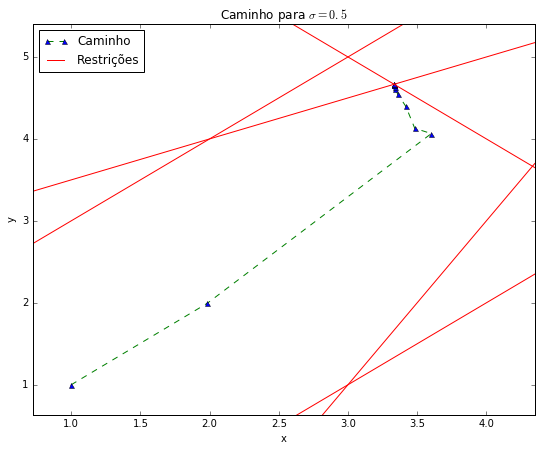

In [7]:
#3. Agora, importamos o widget de interatiividade 
from ipywidgets import interact
D = interact(plotar,sigma=(0,NSIGMA-1))                

Note que podemos usar o slider acima para ver como se comporta o caminho para diferentes valores de $\sigma$.